In [1]:
import os
import numpy as np
import pandas as pd

from mtools import plot_fig, read_file
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('/data/wjk/Workspace/Datasets/IGR')
# IGR_DIRS = ['IGR', 'IGR230307', 'IGR230312']
# IGR_DIR = 'IGR230307'

In [4]:
pos_df = pd.read_csv(f'Output/stat_pos_df.csv')
quality_count = pos_df[['phone', 'Quality', 'timestamp', 'trip']].groupby(['phone', 'Quality', 'trip']).count()
print(quality_count)

                              timestamp
phone    Quality trip                  
Mate30_2 4.0     04_19_10_53        490
                 04_19_11_02        490
                 04_19_11_12        490
                 04_19_11_21        489
                 04_19_11_31        489
                 04_19_11_41        489
                 04_19_11_51        490
                 04_19_12_01        490


In [3]:
quality_count_table = pd.pivot_table(quality_count, 'timestamp', index=['trip'], columns=['Quality'], aggfunc=np.max)
quality_count_table.fillna(0, inplace=True)
quality_count_table = quality_count_table.astype('int16')
print(quality_count_table)
quality_count_table.to_csv('Output/quality_count_table.csv', header=True)

Quality      4.0
trip            
04_19_10_53  490
04_19_11_02  490
04_19_11_12  490
04_19_11_21  489
04_19_11_31  489
04_19_11_41  489
04_19_11_51  490
04_19_12_01  490


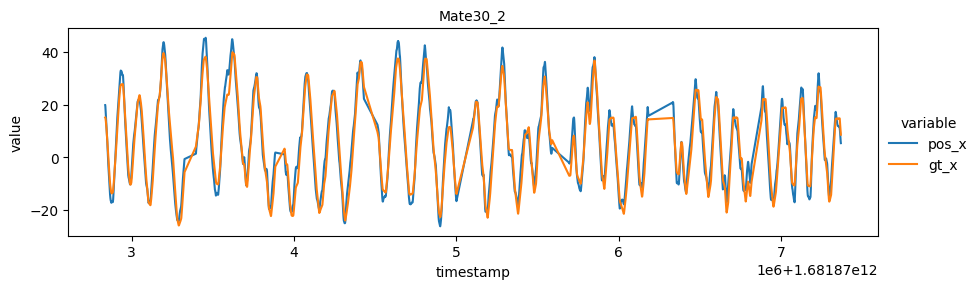

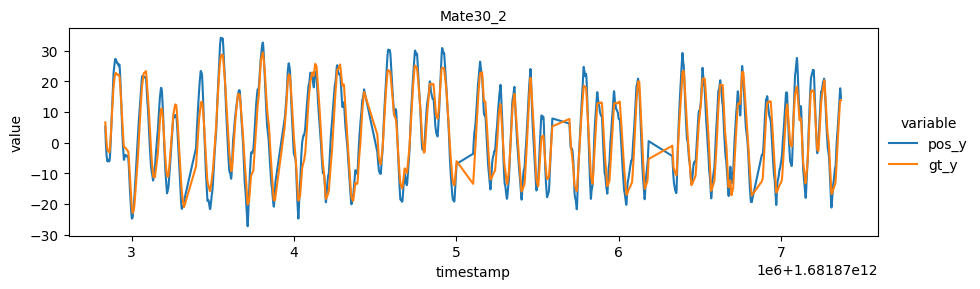

In [12]:
pos_df.columns
melt_pos_df = pd.melt(pos_df[['timestamp', 'pos_x', 'gt_x', 'phone']], id_vars=['timestamp', 'phone'], value_vars=['pos_x', 'gt_x'])
# melt_sub_df['timestamp'] = melt_sub_df['timestamp']-np.min(melt_sub_df['timestamp'].values)

# pre_duration = 0
# duration = 20
g = sns.FacetGrid(melt_pos_df, hue='variable', col="phone",  col_wrap=1, despine=False, aspect=3)
g.map(sns.lineplot, "timestamp", "value")
g.set_titles("{col_name}")
g.add_legend()
plt.show()

melt_pos_df = pd.melt(pos_df[['timestamp', 'pos_y', 'gt_y', 'phone']], id_vars=['timestamp', 'phone'], value_vars=['pos_y', 'gt_y'])
# melt_sub_df['timestamp'] = melt_sub_df['timestamp']-np.min(melt_sub_df['timestamp'].values)

# pre_duration = 0
# duration = 20
g = sns.FacetGrid(melt_pos_df, hue='variable', col="phone",  col_wrap=1, despine=False, aspect=3)
g.map(sns.lineplot, "timestamp", "value")
g.set_titles("{col_name}")
g.add_legend()
plt.show()